# Lab 1

Gillian Mikhaela La Vina

## Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

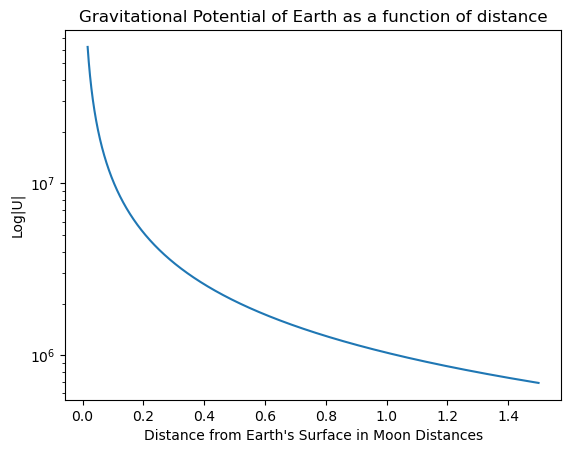

In [2]:
G = 6.67e-11 # In SI units

# U = -(GM)/R

def potential(M, xm, ym, x, y): # M mass, (xm, ym) mass location, (x,y) evaluation point
    r = np.sqrt( (xm-x)**2 + (ym-y)**2 )
    G = 6.67e-11
    R_e = 6.4e6 # m
    # For r > R of sphere
    U_out = -(G*M)/r # point source 
    # For r < R inside 
    U_in = np.nan # for now
    #return np.where(r>R_e, U_out, U_in)
    return U_out

M_earth = 5.972e24 # kg
R_e = 6.4e6 # m
D_e_m = 384.4e6 # m

x_dist = np.linspace(R_e, 1.5*D_e_m, 10000)

U = potential(M_earth, 0, 0, x_dist, 0)

fig, ax = plt.subplots()
ax.plot(x_dist/D_e_m, np.abs(U))
ax.set_yscale("log")

ax.set_title("Gravitational Potential of Earth as a function of distance")
ax.set_xlabel("Distance from Earth's Surface in Moon Distances")
ax.set_ylabel("Log|U|");

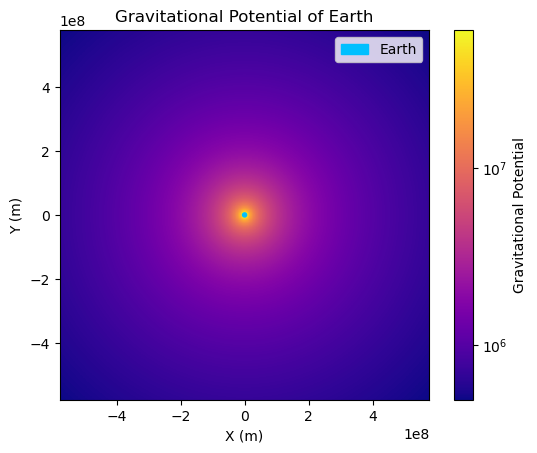

In [3]:
# 2D color mesh plot

G = 6.67e-11 # In SI units
M_earth = 5.972e24 # kg
R_e = 6.4e6 # m
D_e_m = 384.4e6 # m

def potential(M, xm, ym, x, y): # M mass, (xm, ym) mass location, (x,y) evaluation point
    r = np.sqrt( (xm-x)**2 + (ym-y)**2 )
    G = 6.67e-11
    R_e = 6.4e6 # m
    # For r > R_e of sphere
    U_out = -(G*M)/r # point source 
    # For r < R_e inside 
    U_in = np.nan # for now
    # All U
    U = np.where(r>R_e, U_out, U_in)
    return U
    

x_dist = np.linspace(-1.5*D_e_m, 1.5*D_e_m, 1000)
y_dist = x_dist.copy()

x_grid, y_grid = np.meshgrid(x_dist, y_dist)

U_2d = potential(M_earth, 0, 0, x_grid, y_grid)

### Plotting

#colors = np.log(np.abs(U_2d))
#print(colors)

fig, ax = plt.subplots(1,1)
mesh = ax.pcolormesh(x_grid, y_grid, np.abs(U_2d), norm = "symlog", cmap = "plasma");

cbar = fig.colorbar(mesh)
cbar.set_label("Gravitational Potential")


# Plot Earth
disk = plt.Circle((0, 0), R_e, color="deepskyblue", label = "Earth")
ax.add_patch(disk);
ax.legend(loc = "upper right");

ax.set_aspect("equal");

ax.set_xlabel("X (m)");
ax.set_ylabel("Y (m)");

ax.set_title("Gravitational Potential of Earth");

## Part 2

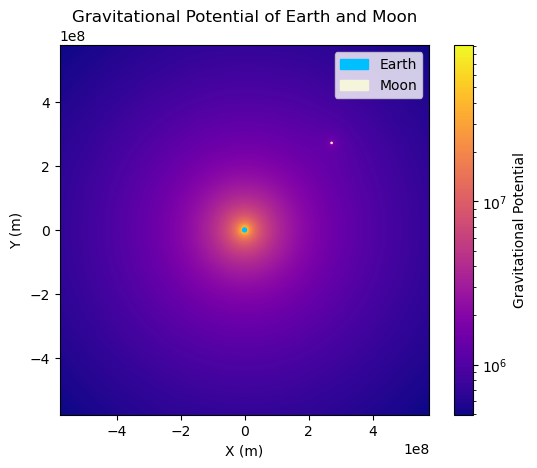

In [4]:
G = 6.67e-11 # In SI units

M_earth = 5.972e24 # kg
M_moon = 7.35e22 # kg

R_e = 6.4e6 # m - radius earth
R_m = 1.73e6 # m - radius moon
D_e_m = 384.4e6 # m

def potential_e(M, xm, ym, x, y): # M mass, (xm, ym) mass location, (x,y) evaluation point
    r = np.sqrt( (xm-x)**2 + (ym-y)**2 )
    G = 6.67e-11
    R_e = 6.4e6 # m
    # For r > R_e of sphere
    U_out = -(G*M)/r # point source    
    # For r < R_e inside 
    U_in = np.nan
    # All U
    U = np.where(r>R_e, U_out, U_in)
    return U
    
def potential_m(M, xm, ym, x, y): # M mass, (xm, ym) mass location, (x,y) evaluation point
    r = np.sqrt( (xm-x)**2 + (ym-y)**2 )
    G = 6.67e-11
    R_m = 1.73e6 # m
    # For r > R_m of sphere
    U_out = -(G*M)/r # point source    
    # For r < R_m inside 
    U_in = np.nan # for now
    # All U
    U = np.where(r>R_m, U_out, U_in)
    return U_out



x_dist = np.linspace(-1.5*D_e_m, 1.5*D_e_m, 1000)
y_dist = x_dist.copy()

x_grid, y_grid = np.meshgrid(x_dist, y_dist)

U_2d = potential_e(M_earth, 0, 0, x_grid, y_grid)

U_2d_moon = potential_m(M_moon, D_e_m/np.sqrt(2), D_e_m/np.sqrt(2), x_grid, y_grid)

U_tot = U_2d + U_2d_moon

fig, ax = plt.subplots(1,1)
mesh = ax.pcolormesh(x_grid, y_grid, np.abs(U_tot), norm = "log", cmap = "plasma");

cbar = fig.colorbar(mesh)
cbar.set_label("Gravitational Potential")


# Plot Earth
disk = plt.Circle((0, 0), R_e, color='deepskyblue', label = "Earth")
ax.add_patch(disk);
# Plot Moon
disk2 = plt.Circle((D_e_m/np.sqrt(2), D_e_m/np.sqrt(2)), R_m, color='beige', label = "Moon")
ax.add_patch(disk2);
ax.legend(loc = "upper right");

ax.set_aspect("equal");

ax.set_xlabel("X (m)");
ax.set_ylabel("Y (m)");

ax.set_title("Gravitational Potential of Earth and Moon");

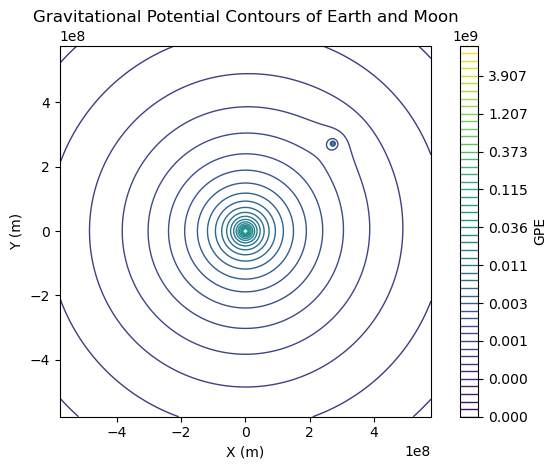

In [5]:
figc, axc = plt.subplots()

levels = np.logspace(5,10,50)

contour = axc.contour(x_grid, y_grid, np.abs(U_tot), levels = levels, norm = "symlog", linewidths = 1);

axc.set_aspect("equal")

cbar = figc.colorbar(contour)
cbar.set_label("GPE")

axc.set_xlabel("X (m)")
axc.set_ylabel("Y (m)")

axc.set_title("Gravitational Potential Contours of Earth and Moon");

figc.tight_layout()

## Part 3

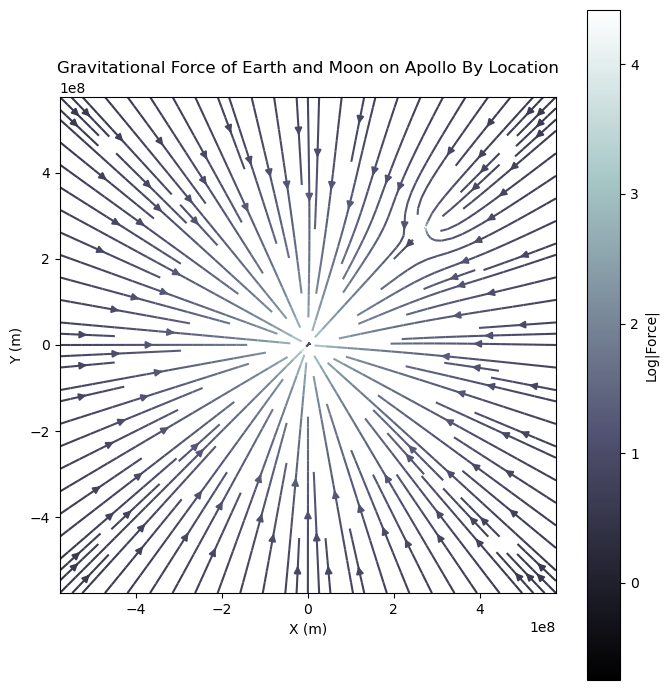

In [6]:
# Function for Force, F = - [GMm / |r|^2 ] * rhat

# get force experienced by m from M

def fg(M, m, xM, yM, xm, ym):
    G = 6.67e-11
    r = np.sqrt((xm-xM)**2 + (ym-yM)**2)
    fx = (-(G * M * m) / r**3) * (xm - xM)
    fy = (-(G * M * m) / r**3) * (ym - yM)
    return fx, fy

######

# Code up gravitational force felt by Apollo from both Earth and Moon

# Masses
M_earth = 5.972e24 # kg
M_moon = 7.35e22 # kg
M_apollo = 5500 # kg

# Radius + distance 
R_e = 6.4e6 # m - radius earth
R_m = 1.73e6 # m - radius moon
D_e_m = 384.4e6 # m



def f_moon0(m, m0, xm, ym, x0, y0): 
    # Gravitational force from the Moon
    # m, xm, ym - mass and coordinates of moon
    # m0, x0, y0 - mass and coordinates of object 
    
    # Constants
    G = 6.67e-11 # gravitational constant in SI
    R_m = 1.73e6 # m - radius moon
    
    # Distance between object and moon
    r_m = np.sqrt( (x0-xm)**2 + (y0-ym)**2 ) 


    # Check if too close, avoid values blowing up 
    if np.isclose(r_m, R_m):
        fx_m, fy_m = 0, 0
    else:
        # Force components
        fx = (-(G * m * m0) / r_m**3) * (x0 - xm)
        fy = (-(G * m * m0) / r_m**3) * (y0 - ym) 

        # also use np.where to double check
        fx_m = np.where(r_m > R_m, fx, 0)
        fy_m = np.where(r_m > R_m, fy, 0)
    return fx_m, fy_m
    

def f_earth0(M, m0, xM, yM, x0, y0):
    # Gravitational force from the Earth
    # M, xM, yM - mass and coordinates of Earth
    # m0, x0, y0 - mass and coordinates of object 
    
    # Constants
    G = 6.67e-11 # gravitational constant in SI
    R_e = 6.4e6 # m - radius Earth    
    
    # Distance between object and Earth
    r_M = np.sqrt( (x0-xM)**2 + (y0-yM)**2 ) 


    # Check if the distance is too close and avoid singularity 
    if np.isclose(r_M, R_e): # radius from Earth vs Earth's radius 
        fx_M, fy_M = 0, 0  # Set force to zero if too close
    else:
        # Force components
        fx = (-(G * M * m0) / r_M**3) * (x0 - xM)
        fy = (-(G * M * m0) / r_M**3) * (y0 - yM)
        
        # Calculate only if outside the Earth's radius (double check)
        fx_M = np.where(r_M > R_e, fx, 0)
        fy_M = np.where(r_M > R_e, fy, 0)

    return fx_M, fy_M

f_earth = np.vectorize(f_earth0)
f_moon = np.vectorize(f_moon0)
    

# Earth coords
x_e = 0
y_e = 0

# Moon coords
x_moon = D_e_m/np.sqrt(2)
y_moon = D_e_m/np.sqrt(2)


# Plotting

# Get a meshgrid of X and Y coordinate values 
x_dist = np.linspace(-1.5*D_e_m, 1.5*D_e_m, 200)
y_dist = x_dist.copy()
X, Y = np.meshgrid(x_dist, y_dist)

# Evaluate forces at every coordinate point (separately)
fxm, fym = f_moon(M_moon, M_apollo, x_moon, y_moon, X, Y)
fxM, fyM = f_earth(M_earth, M_apollo, x_e, y_e, X, Y)
# Add forces to get total force 
FX, FY = fxm+fxM, fym+fyM # add Earth and Moon forces 

# Magnitude of the force for the color bar
F_magnitude = np.sqrt(FX**2 + FY**2)

fig3, ax3 = plt.subplots(figsize = (7,7))
stream = ax3.streamplot(X, Y, FX, FY, color=np.log10(F_magnitude), cmap = "bone", density = 1.5)

ax3.set_aspect("equal");
ax3.set_title("Gravitational Force of Earth and Moon on Apollo By Location");

cbar = fig3.colorbar(stream.lines)
cbar.set_label("Log|Force|")

ax3.set_ylabel("Y (m)")
ax3.set_xlabel("X (m)")

fig3.tight_layout();

## Part 4

In [7]:
# wet mass = 2.8e6 kg

m_0 = 2.8e6 # kg
m_rate = 1.3e4 # kg/s
m_f = 7.5e5 # # kg

T = (m_0 - m_f) / m_rate

print(f"The burn time for the first stage of the Saturn V rocket is {T} seconds")

The burn time for the first stage of the Saturn V rocket is 157.69230769230768 seconds


In [8]:
# Change in velocity 

import scipy 

def delta_v(ve, m0, m_rate, g, t):
    m = m0 - m_rate*t
    delta = ve * np.log( m0 / m ) - g*t
    T = (m_0 - m_f) / m_rate # burn time to get to 0
    return np.where(t <= T, delta, 0)

v_e = 2.4e3 # m/s, exhaust speed

m_0 = 2.8e6 # kg, wet mass
m_rate = 1.3e4 # kg/s, burn rate
m_f = 7.5e5 # # kg, dry mass
g = 9.8 # m/s, gravitational constant 

t = np.linspace(0, T, 100)

#change_v = delta_v(v_e, m_0, m_rate, g, t)

#fig4, ax4 = plt.subplots()
#ax4.plot(t, change_v);

# Calculate altitude 
alt, err = scipy.integrate.quad(lambda t: delta_v(v_e, m_0, m_rate, g, t), 0, T)

print(f"The calculated altitude after burning all the fuel will be {alt/1000} km with an error of {err} meters")

The calculated altitude after burning all the fuel will be 74.21831445319064 km with an error of 5.845859165582349e-08 meters
